In [1]:
plotpars = {'axes.labelsize': 18,
            'axes.linewidth': 1.,
            'figure.figsize': (7.,5.),
            'font.size': 20,
            'legend.frameon': True,
            'legend.framealpha': 0.85,
            'legend.edgecolor': 'black',
            'legend.loc': 'best',
            'legend.fontsize': 12,
            'mathtext.fontset': 'stixsans',
            'savefig.bbox': 'tight',
            'xtick.labelsize': 18,
            'ytick.labelsize': 18,
           }

# Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from astropy.cosmology import FlatLambdaCDM

# Data

In [3]:
data_path = './../../Data/'

In [4]:
stripe01 = pd.read_csv(os.path.join(data_path, 'Stripe82_1half_01.csv'))

In [5]:
stripe02 = pd.read_csv(os.path.join(data_path, 'Stripe82_2half_01.csv'))

In [6]:
stripe82_all = pd.concat([stripe01, stripe02], ignore_index=True)

In [7]:
stripe82_all_clean = stripe82_all[stripe82_all['clean']==1].reset_index(drop=True)
stripe82_all_clean

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,absMagU,absMagG,absMagR,absMagI,absMagZ,lumDist,nnAvgZ,nnObjID,nnSpecz,clean
0,1237656239009497159,0.000000e+00,326.747455,1.003742,21.97997,20.32912,19.73999,19.44456,19.18480,0.343592,...,-16.7028,-18.5210,-18.9334,-19.1344,-19.3629,454.4620,0.099678,1237663783126958851,0.060017,1
1,1237656567037952129,1.105695e+18,311.617251,-1.198606,17.15196,15.94101,15.49961,15.36972,15.21828,0.008554,...,-17.0058,-18.1205,-18.4945,-18.5781,-18.6876,57.7726,0.015763,1237662473690874067,0.011166,1
2,1237656567038215656,1.150697e+18,312.266450,-1.082301,21.10034,19.28990,18.71060,18.41736,18.15458,0.234666,...,-17.2207,-18.7424,-19.2170,-19.2930,-19.6486,345.5380,0.088641,1237671139870114235,0.156650,1
3,1237656567038542136,1.151851e+18,313.006431,-1.106804,21.74673,20.01973,19.45312,19.07585,18.82171,0.250983,...,-17.1211,-18.5254,-19.0730,-19.4035,-19.4980,416.7800,0.107099,1237666407366590921,0.088947,1
4,1237656567038739524,0.000000e+00,313.464092,-1.162194,22.05741,20.81289,20.40400,20.16185,20.07628,0.206168,...,-16.7651,-17.7461,-18.0920,-18.2576,-18.6882,443.1610,0.125879,1237651190285205849,0.182062,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,1237678617972769016,4.605937e+17,41.286700,1.240488,18.24276,16.17759,15.23399,14.81498,14.46653,0.035700,...,-19.6702,-21.6364,-22.3639,-22.7386,-22.9763,313.4350,0.068483,1237662661603033399,0.061925,1
21538,1237678617973424341,4.606594e+17,42.845240,1.148501,19.83836,17.73394,16.77602,16.33247,15.98942,0.060716,...,-18.1310,-20.3805,-21.1160,-21.4812,-21.7030,350.7490,0.080606,1237658614132310130,0.118846,1
21539,1237678617973620885,4.617221e+17,43.287170,1.227723,20.12005,18.18211,17.20038,16.76435,16.42608,0.068349,...,-18.5164,-20.3920,-21.1225,-21.4920,-21.7982,426.0230,0.092871,1237664092366897372,0.093453,1
21540,1237680001451098306,1.751904e+18,32.540904,-0.840783,21.01738,19.17371,18.45321,18.10843,17.83048,0.154340,...,-17.4472,-19.1784,-19.7457,-19.9592,-20.2548,416.7170,0.097530,1237653664180600991,0.087430,1


# AB magnitudes

In [8]:
mag_ab_u = pd.DataFrame(stripe82_all_clean['dered_u'] + stripe82_all_clean['kcorrU'], columns=['mag_ab_u'])
mag_ab_g = pd.DataFrame(stripe82_all_clean['dered_g'] + stripe82_all_clean['kcorrG'], columns=['mag_ab_g'])
mag_ab_r = pd.DataFrame(stripe82_all_clean['dered_r'] + stripe82_all_clean['kcorrR'], columns=['mag_ab_r'])
mag_ab_i = pd.DataFrame(stripe82_all_clean['dered_i'] + stripe82_all_clean['kcorrI'], columns=['mag_ab_i'])
mag_ab_z = pd.DataFrame(stripe82_all_clean['dered_z'] + stripe82_all_clean['kcorrZ'], columns=['mag_ab_z'])

In [9]:
mags_ab = mag_ab_u.join([mag_ab_g, mag_ab_r, mag_ab_i, mag_ab_z])

# Absolute Magnitudes


### SDSS DR16: the luminosity distance in Mpc for Omega=0.2739, Lambda=0.726, h=0.705 cosmology

In [10]:
# adopted_cosmology = FlatLambdaCDM(H0=70, Om0=0.3)

In [11]:
# redshift = stripe82_all_clean['photoZ']

In [12]:
# luminosity_distance = adopted_cosmology.luminosity_distance(redshift).value 

In [13]:
# mag_absolute_u = mag_ab_u.values - 5 * np.log10(luminosity_distance) - 25

In [14]:
# mag_absolute_u = mag_ab_u.values - 5 * np.log10(luminosity_distance) - 25
# mag_absolute_g = mag_ab_g.values - 5 * np.log10(luminosity_distance) - 25
# mag_absolute_r = mag_ab_r.values - 5 * np.log10(luminosity_distance) - 25
# mag_absolute_i = mag_ab_i.values - 5 * np.log10(luminosity_distance) - 25
# mag_absolute_z = mag_ab_z.values - 5 * np.log10(luminosity_distance) - 25

In [15]:
s2n_r = stripe82_all_clean['modelMag_r']/stripe82_all_clean['modelMagErr_r']

In [16]:
s2n_r = pd.DataFrame(s2n_r, columns=['S2N_r'])

In [17]:
stripe82_final = stripe82_all_clean.join(mags_ab).join(s2n_r)

In [18]:
stripe82_final.to_csv(os.path.join(data_path, 'stripe82_SDSS.csv'))

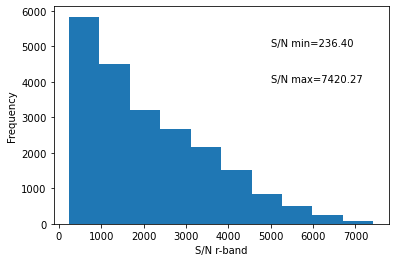

In [19]:
plt.hist(s2n_r, bins=10)
plt.xlabel("S/N r-band")
plt.ylabel("Frequency")
plt.text(5000, 5000, "S/N min=%.2f" % s2n_r.min())
plt.text(5000, 4000, "S/N max=%.2f" % s2n_r.max())
plt.show()

In [20]:
stripe82_final

,DR16_objID,specObjID,ra,dec,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z,modelMagErr_u,...,nnAvgZ,nnObjID,nnSpecz,clean,mag_ab_u,mag_ab_g,mag_ab_r,mag_ab_i,mag_ab_z,S2N_r
0,1237656239009497159,0.000000e+00,326.747455,1.003742,21.97997,20.32912,19.73999,19.44456,19.18480,0.343592,...,0.099678,1237663783126958851,0.060017,1,21.70532,20.07079,19.42966,19.17141,18.93993,667.040962
1,1237656567037952129,1.105695e+18,311.617251,-1.198606,17.15196,15.94101,15.49961,15.36972,15.21828,0.008554,...,0.015763,1237662473690874067,0.011166,1,16.87841,15.71707,15.34577,15.24714,15.12280,4451.706813
2,1237656567038215656,1.150697e+18,312.266450,-1.082301,21.10034,19.28990,18.71060,18.41736,18.15458,0.234666,...,0.088641,1237671139870114235,0.156650,1,20.76741,19.02905,18.54622,18.14980,17.97198,864.875709
3,1237656567038542136,1.151851e+18,313.006431,-1.106804,21.74673,20.01973,19.45312,19.07585,18.82171,0.250983,...,0.107099,1237666407366590921,0.088947,1,21.48936,19.81544,19.25354,18.85088,18.62421,850.270601
4,1237656567038739524,0.000000e+00,313.464092,-1.162194,22.05741,20.81289,20.40400,20.16185,20.07628,0.206168,...,0.125879,1237651190285205849,0.182062,1,21.53726,20.42892,20.13690,19.79094,19.81346,704.106760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21537,1237678617972769016,4.605937e+17,41.286700,1.240488,18.24276,16.17759,15.23399,14.81498,14.46653,0.035700,...,0.068483,1237662661603033399,0.061925,1,18.22125,16.18029,15.14416,14.72448,14.37533,5267.354551
21538,1237678617973424341,4.606594e+17,42.845240,1.148501,19.83836,17.73394,16.77602,16.33247,15.98942,0.060716,...,0.080606,1237658614132310130,0.118846,1,19.77000,17.70565,16.65045,16.21319,15.87081,3730.143889
21539,1237678617973620885,4.617221e+17,43.287170,1.227723,20.12005,18.18211,17.20038,16.76435,16.42608,0.068349,...,0.092871,1237664092366897372,0.093453,1,19.99364,18.11789,17.03359,16.61320,16.27502,3248.402086
21540,1237680001451098306,1.751904e+18,32.540904,-0.840783,21.01738,19.17371,18.45321,18.10843,17.83048,0.154340,...,0.097530,1237653664180600991,0.087430,1,21.08149,19.17671,18.33880,17.98339,17.70380,1632.334053


In [21]:
palette = ['#feedde','#fdbe85','#fd8d3c','#e6550d','#a63603']

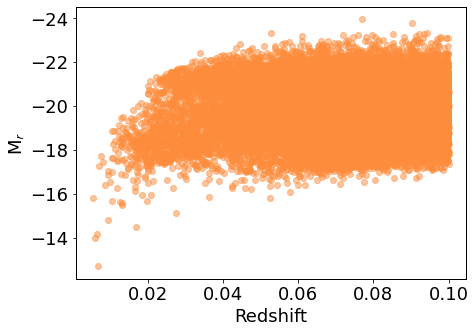

In [22]:
plt.rcParams.update(plotpars)
plt.plot(stripe82_final['photoZ'], stripe82_final['absMagR'], 'o', alpha=0.5, color=palette[2])
# plt.plot(stripe82_final['photoZ'].values[6], stripe82_final['absMagR'].values[6], 'o', alpha=1, color=palette[3])
plt.gca().invert_yaxis()
plt.ylabel("M$_r$")
plt.xlabel("Redshift")
plt.savefig(os.path.join('../../Figures/', 'magr_redshift.png'))
plt.savefig(os.path.join('../../Figures/', 'magr_redshift.pdf'))
plt.show()